# Codes

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sets'

In [48]:
%run 'Color_and_Legends.ipynb'

In [49]:
%run 'Plotting_Tools.ipynb'

In [51]:
%run 'Load_Delay_Data_Frame.ipynb'

In [55]:
stations = pd.read_csv('../stations_ridership.csv')

## All the top codes

In [61]:
all_top_codes = ttc.groupby('Code Description').size().sort_values(ascending=False)
all_top_codes.head(20)

Code Description
Miscellaneous Speed Control                                   13741
Operator Overspeeding                                         10192
Passenger Assistance Alarm Activated - No Trouble Found        4943
Miscellaneous General Delays                                   4094
Injured or ill Customer (In Station) - Transported             4021
Miscellaneous Other                                            3535
Disorderly Patron                                              2681
Injured or ill Customer (On Train) - Medical Aid Refused       2409
Injured or ill Customer (On Train) - Transported               2093
Operator Violated Signal                                       1766
Escalator/Elevator Incident                                    1721
Door Problems - Faulty Equipment                               1448
Passenger Other                                                1125
Brakes                                                         1095
Misc. Transportation Other - Em

## Top codes by line

In [59]:
line_codes = ttc.groupby(['Line', 'Code Description']).size().sort_values(ascending=False)
line_codes.head(5)

Line              Code Description                                       
Bloor-Danforth    Miscellaneous Speed Control                                8848
                  Operator Overspeeding                                      5812
Yonge-University  Miscellaneous Speed Control                                4349
                  Operator Overspeeding                                      4012
                  Passenger Assistance Alarm Activated - No Trouble Found    3693
dtype: int64

In [78]:
groups = ttc.groupby(['Line'], as_index=False)
final = {}
top_codes = []
for title, g in groups:
    group_by = g.groupby('Code Description').size().sort_values(ascending=False).head(10)
    final[title] = group_by
    top_codes = top_codes + list(group_by.index)
    
top_codes = set(top_codes)
# top_codes
# final_df = pd.DataFrame(final)
# final_df

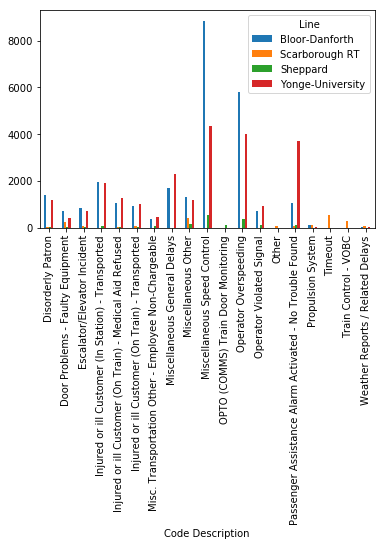

In [106]:
line_top_codes = ttc[ttc['Code Description'].isin(top_codes)].groupby(['Line', 'Code Description']).size().sort_values(ascending=False)
line_top_codes = line_top_codes.unstack().T
line_top_codes.plot.bar()

plt.show()

Some codes are pretty common across lines: Miscellaneous Other /Passenger Assistance Alarm Activated - No Trouble Found

While others are more unique: Weather Reports / Related Delays -- scar
Propulsion System, Train Control - VOBC, Timeout

What about if we look at total time of each delay

In [39]:
groups = ttc.groupby(['Line'], as_index=False)
final = {}
for title, g in groups:
   final[title] = g.groupby('Code Description')['Min Delay'].sum().sort_values(ascending=False).head(10)

final_df = pd.DataFrame(final)
final_df

,Bloor-Danforth,Scarborough RT,Sheppard,Yonge-University
Disorderly Patron,4269.0,NaN,174.0,4121.0
Door Problems - Debris Related,2111.0,NaN,NaN,NaN
Door Problems - Faulty Equipment,3059.0,1123.0,247.0,1756.0
Fire/Smoke Plan B,6383.0,NaN,838.0,3474.0
High Voltage,NaN,2023.0,NaN,NaN
Injured or ill Customer (On Train) - Medical Aid Refused,3394.0,NaN,NaN,4073.0
Injured or ill Customer (On Train) - Transported,5185.0,NaN,NaN,5391.0
Misc. Transportation Other - Employee Non-Chargeable,NaN,NaN,203.0,NaN
Miscellaneous Other,NaN,677.0,265.0,1673.0
Miscellaneous Speed Control,1815.0,NaN,228.0,NaN


### Outdoor/Indoor Codes

In [11]:
surface = stations[stations['Grade'] == 'Surface']
underground = stations[stations['Grade'] == 'Underground']

#### Outdoor Codes

In [12]:
surface_delays = ttc[ttc['Station'].isin(surface['Station'])]
surface_codes = surface_delays.groupby('Code Description').size().sort_values(ascending = False)
surface_codes.head(10)

Code Description
Miscellaneous Speed Control                                 4034
Operator Overspeeding                                       1940
Passenger Assistance Alarm Activated - No Trouble Found      742
Injured or ill Customer (In Station) - Transported           432
Operator Violated Signal                                     427
Brakes                                                       417
Disorderly Patron                                            317
Miscellaneous Other                                          297
Injured or ill Customer (On Train) - Medical Aid Refused     294
Injured or ill Customer (On Train) - Transported             257
dtype: int64

In [13]:
underground_delays = ttc[ttc['Station'].isin(underground['Station'])]
underground_codes = underground_delays.groupby('Code Description').size().sort_values(ascending = False)
underground_codes.head(10)

Code Description
Miscellaneous Speed Control                                 6881
Operator Overspeeding                                       6826
Miscellaneous General Delays                                3996
Passenger Assistance Alarm Activated - No Trouble Found     3920
Injured or ill Customer (In Station) - Transported          3282
Miscellaneous Other                                         2156
Disorderly Patron                                           2113
Injured or ill Customer (On Train) - Medical Aid Refused    1928
Injured or ill Customer (On Train) - Transported            1612
Escalator/Elevator Incident                                 1305
dtype: int64

In [14]:
surface_codes_precent = surface_delays.groupby('Code Description').size().apply(lambda x: float(x) / surface_delays.groupby('Code Description').size().sum()*100)
surface_codes_precent.sort_values(ascending=False).head(25)

Code Description
Miscellaneous Speed Control                                 29.368084
Operator Overspeeding                                       14.123471
Passenger Assistance Alarm Activated - No Trouble Found      5.401864
Injured or ill Customer (In Station) - Transported           3.145020
Operator Violated Signal                                     3.108620
Brakes                                                       3.035818
Disorderly Patron                                            2.307804
Miscellaneous Other                                          2.162202
Injured or ill Customer (On Train) - Medical Aid Refused     2.140361
Injured or ill Customer (On Train) - Transported             1.870996
Door Problems - Faulty Equipment                             1.870996
Signals - Train Stops                                        1.434188
Signals Track Weather Related                                1.383227
Escalator/Elevator Incident                                  1.375946
Sig

Interestingly looks like we have different types of issues at the surface more signal issues happen here as well as Ice / Snow Related Problems

In [15]:
underground_codes_precent = underground_delays.groupby('Code Description').size().apply(lambda x: float(x) / underground_delays.groupby('Code Description').size().sum()*100)
underground_codes_precent.sort_values(ascending=False).head(25)

Code Description
Miscellaneous Speed Control                                   13.680736
Operator Overspeeding                                         13.571386
Miscellaneous General Delays                                   7.944808
Passenger Assistance Alarm Activated - No Trouble Found        7.793705
Injured or ill Customer (In Station) - Transported             6.525240
Miscellaneous Other                                            4.286538
Disorderly Patron                                              4.201046
Injured or ill Customer (On Train) - Medical Aid Refused       3.833231
Injured or ill Customer (On Train) - Transported               3.204963
Escalator/Elevator Incident                                    2.594588
Operator Violated Signal                                       2.250631
Door Problems - Faulty Equipment                               1.763525
Passenger Other                                                1.666103
Injured or ill Customer (In Station) - Medical 

### End of the line codes

In [16]:
endline_stations = ['FINCH', 'SHEPPARD - SHP', 'DOWNSVIEW', 'KENNEDY - BD', 'KENNEDY - SRT', 'KIPLING', 'MCCOWAN', 'DON MILLS']

In [17]:
endline_delays = ttc[ttc['Station'].isin(endline_stations)]

In [18]:
endline_codes = endline_delays.groupby('Code Description').size().sort_values(ascending = False)
endline_codes.head(10)

Code Description
Miscellaneous Speed Control                                3668
Operator Overspeeding                                      1946
Injured or ill Customer (In Station) - Transported          554
Miscellaneous Other                                         527
Brakes                                                      442
Passenger Assistance Alarm Activated - No Trouble Found     436
Operator Violated Signal                                    401
Misc. Transportation Other - Employee Non-Chargeable        381
Timeout                                                     359
Escalator/Elevator Incident                                 307
dtype: int64

In [19]:
endline_codes_precent = endline_delays.groupby('Code Description').size().apply(lambda x: float(x) / underground_delays.groupby('Code Description').size().sum()*100)
endline_codes_precent.sort_values(ascending=False).head(25)

Code Description
Miscellaneous Speed Control                                 7.292681
Operator Overspeeding                                       3.869018
Injured or ill Customer (In Station) - Transported          1.101457
Miscellaneous Other                                         1.047776
Brakes                                                      0.878780
Passenger Assistance Alarm Activated - No Trouble Found     0.866851
Operator Violated Signal                                    0.797264
Misc. Transportation Other - Employee Non-Chargeable        0.757500
Timeout                                                     0.713760
Escalator/Elevator Incident                                 0.610374
Injured or ill Customer (On Train) - Transported            0.610374
Disorderly Patron                                           0.602422
Injured or ill Customer (On Train) - Medical Aid Refused    0.542776
Door Problems - Faulty Equipment                            0.532835
Unsanitary Vehicl

In [20]:
Looks like quite a few unique codes here -- 'Unsanitary Vehicle' 

SyntaxError: invalid syntax (<ipython-input-20-661760babde4>, line 1)

### Any stations with interesting codes -- does Davisville have more signal delays

## Year to year

In [44]:
ttc['Year'] = ttc['Date'].dt.year
codes_2014 = ttc[ttc['Date'].dt.year == 2014]
codes_2015 = ttc[ttc['Date'].dt.year == 2015]
codes_2016 = ttc[ttc['Date'].dt.year == 2016]
codes_2017 = ttc[ttc['Date'].dt.year == 2017]

**TODO** Percentages here would be really useful

In [46]:
groups = ttc.groupby(['Year'], as_index=False)
final = {}


for title, g in groups:
    final[title] = g.groupby('Code Description').size() \
        .apply(lambda x: float(x) / g.groupby('Code Description').size().sum() * 100) \
        .sort_values(ascending=False).head(20)

# with_apply = ttc.groupby(['Line'], as_index=False).apply(lambda g: g.groupby('Code Description').size().sort_values(ascending=False).head(3))
final_df = pd.DataFrame(final)
final_df

,2014,2015,2016,2017
Assault / Patron Involved,NaN,NaN,NaN,1.046926
Brakes,1.160737,2.051282,1.315280,1.195426
Disorderly Patron,3.391370,2.967711,3.868472,4.336204
Door Problems - Debris Related,1.054756,0.868946,0.831721,1.232551
Door Problems - Faulty Equipment,2.311380,2.046534,1.697292,1.544402
Escalator/Elevator Incident,2.018673,2.407407,2.214700,2.643303
Fire/Smoke Plan B,1.332324,1.044634,0.986460,NaN
Injured or ill Customer (In Station) - Medical Aid Refused,NaN,1.082621,1.455513,1.700327
Injured or ill Customer (In Station) - Transported,2.614181,5.503324,6.484526,7.447282
Injured or ill Customer (On Train) - Medical Aid Refused,3.613424,2.654321,3.220503,3.474903


Fire/Smoke Plan B goes down


Injured or ill Customer (In Station) - Medical Aid Refused / Injured or ill Customer (In Station) - Medical Aid Refused go up BUT

Injured or ill Customer (On Train) - Medical Aid Refused/Injured or ill Customer (On Train) - Transported go down

Operator Overshot Platform go down

### Delays and Codes

Which codes have the longest average delays and cause the longest delays

In [24]:
ttc.groupby('Code Description')['Min Delay'].mean().sort_values(ascending=False)[:25]

Code Description
High Voltage                                         121.117647
Force Majeure                                         88.833333
Priority One - Train in Contact With Person           65.106383
Fire/Smoke Plan A                                     47.588235
Structure Related Problem                             42.454545
Traction Power Rail Related                           39.400000
Rail Defect/Fastenings/Power Rail                     36.258065
Vehicle                                               29.500000
Bomb Threat                                           23.051282
Traction Power or Related Components Failure          20.800000
Rail Related Problem                                  17.837838
Switch Related                                        16.200000
Fire/Smoke Plan B                                     14.194087
Other                                                 13.032787
Doors Open in Error                                   12.619048
Weather Reports / Relat

In [41]:
ttc.groupby('Code Description')['Min Delay'].sum().sort_values(ascending=False)[:25]

Code Description
Fire/Smoke Plan B                                           11043
Injured or ill Customer (On Train) - Transported            10928
Disorderly Patron                                            8792
Injured or ill Customer (On Train) - Medical Aid Refused     7656
Door Problems - Faulty Equipment                             6189
Priority One - Train in Contact With Person                  6120
Unauthorized at Track Level                                  5275
Passenger Other                                              4008
Miscellaneous Other                                          3653
Passenger Assistance Alarm Activated - No Trouble Found      3340
Door Problems - Debris Related                               2887
Miscellaneous Speed Control                                  2853
Brakes                                                       2550
Misc. Transportation Other - Employee Non-Chargeable         2505
Equipment - No Trouble Found                               

In [42]:
ttc[ttc['Code Description'] == 'High Voltage'].groupby('Line').size()
ttc[ttc['Code Description'] == 'Fire/Smoke Plan B'].groupby('Line').size()
# ttc[ttc['Code Description'] == 'High Voltage'].groupby('Line').size()

Line
Bloor-Danforth      445
Scarborough RT       18
Sheppard             39
Yonge-University    275
dtype: int64